# CA2 Assignment
## Data Analysis: Is Singapore's Population Coming to a Decline? 
### Module: EP0302 Programming for Data Science
### Name: Ang Teong-Hean Isaac
### Admin Number: P2021487

### Is Singapore's Population Coming to a Decline?
- What is the population number now?
- Is Singapore's Population aging?
<br>
<br>
If So,
<br>
<br>
- Are is the life expectancy increasing?
- Are Birth Rates Decling? 

What is the reason for Declining Birth Rates?
- Is the cost of living in Singapore increasing?
- Is there anything being done to counter this?


**URLs of Datasets**
<br>

**Number of citizens dataset:**
https://data.gov.sg/dataset/singapore-citizens-by-age-group-ethnic-group-and-sex-end-june-annual
<br>
**Live births dataset:**
https://data.gov.sg/dataset/births-and-fertility-annual
<br>
**Life expectancy dataset:**
https://data.gov.sg/dataset/health-adjusted-life-expectancy
<br>
<br>
**Price range of HDB flats offered:**
https://data.gov.sg/dataset/price-range-of-hdb-flats-offered
<br>
**Housing grant dataset:**
https://data.gov.sg/dataset/households-that-benefitted-from-cpf-housing-grant
<br>
**Property tax dataset:**
https://data.gov.sg/dataset/annual-value-and-property-tax-by-property-type-annual?resource_id=48520cf7-bbcd-4824-8ce0-93f5f9794672



# Importing required dependancies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Setting figuresize for easier inline viewing
plt.rcParams['figure.figsize'] = [20, 15]

## What is the population figure like?

To answer the question if Singapore's population is coming to a decline, we should first get an idea of the population figure before we look at other factors that contribute to a population decline.

Dataset used:
- singapore-citizens-by-age-group-ethnic-group-and-sex-end-june-annual.csv (Found at: https://data.gov.sg/dataset/singapore-citizens-by-age-group-ethnic-group-and-sex-end-june-annual)

In [2]:
# Import dataset into a pandas dataframe
population_df = pd.read_csv("./data/population/singapore-citizens-by-age-group-ethnic-group-and-sex-end-june-annual.csv", parse_dates=['year'] )

# Drop rows that sort by ethnicity as we are only interested in total population numbers in age
age_population_df = population_df.query("level_1 == 'Total Citizen'")

# drop rows that sort by xxx and over to avoid duplicate data 
age_population_df = age_population_df.query("level_2 != '65 Years & Over'")
age_population_df = age_population_df.query("level_2 != '70 Years & Over'")
age_population_df = age_population_df.query("level_2 != '75 Years & Over'")
age_population_df = age_population_df.query("level_2 != '80 Years & Over'")

# Drop level_1 column as it is just the total population
age_population_df = age_population_df.drop('level_1', 1)

# Rename columns 
age_population_df.columns = ["Year", "Age Group", "Number"]

# Limit to last 20 years of dataset
age_population_df = age_population_df[(age_population_df['Year'] > '1998-01-01') & (age_population_df['Year'] < '2019-01-01')]

# Add a column for number * median age in the group to calculate the average age for each year later on
average_age = []

# Add an median age value for each age group
for i, v in zip(age_population_df["Age Group"], age_population_df["Number"]):
    if i == "0  -  4 Years":
        average_age.append(int(v)*2)
    elif i == "5  -  9 Years":
        average_age.append(int(v)*7)
    elif i == "10 - 14 Years":
        average_age.append(int(v)*12)
    elif i == "15 - 19 Years":
        average_age.append(int(v)*17)
    elif i == "20 - 24 Years":
        average_age.append(int(v)*22)
    elif i == "25 - 29 Years":
        average_age.append(int(v)*27)
    elif i == "30 - 34 Years":
        average_age.append(int(v)*32)
    elif i == "35 - 39 Years":
        average_age.append(int(v)*37)
    elif i == "40 - 44 Years":
        average_age.append(int(v)*42)
    elif i == "45 - 49 Years":
        average_age.append(int(v)*47)
    elif i == "50 - 54 Years":
        average_age.append(int(v)*52)
    elif i == "55 - 59 Years":
        average_age.append(int(v)*57)
    elif i == "60 - 64 Years":
        average_age.append(int(v)*62)    
    elif i == "65 - 69 Years":
        average_age.append(int(v)*67)    
    elif i == "70 - 74 Years":
        average_age.append(int(v)*72)    
    elif i == "75 - 79 Years":
        average_age.append(int(v)*77)    
    elif i == "80 - 84 Years":
        average_age.append(int(v)*82)    
    elif i == "85 Years & Over":
        average_age.append(int(v)*87)

# Add new column for Number * Median Age
age_population_df["Number * Median Age"] = average_age


## Numerical analysis of the **population** dataset with Pandas

In [3]:
print("Raw Data")
display(population_df)
print()

print("Data after excluding ethnicity, limiting to the last 10 years in the dataset")
display(age_population_df)
print()

print("Summary of cleaned up dataset")
display(age_population_df.describe(include="all", datetime_is_numeric=True))

print('Technical summary of cleaned up dataset')
display(age_population_df.info())
print()

print("Number of non-na entries")
display(age_population_df.notna().sum())

Raw Data


,year,level_1,level_2,value
0,1970-01-01,Total Citizen,0 - 4 Years,226454
1,1970-01-01,Total Citizen,5 - 9 Years,267122
2,1970-01-01,Total Citizen,10 - 14 Years,273014
3,1970-01-01,Total Citizen,15 - 19 Years,227001
4,1970-01-01,Total Citizen,20 - 24 Years,175775
...,...,...,...,...
10225,2018-01-01,Other Ethnic Groups (Females),65 Years & Over,2590
10226,2018-01-01,Other Ethnic Groups (Females),70 Years & Over,1742
10227,2018-01-01,Other Ethnic Groups (Females),75 Years & Over,1200
10228,2018-01-01,Other Ethnic Groups (Females),80 Years & Over,775



Data after excluding ethnicity, limiting to the last 10 years in the dataset


,Year,Age Group,Number,Number * Median Age
3630,1999-01-01,0 - 4 Years,217384,434768
3631,1999-01-01,5 - 9 Years,240213,1681491
3632,1999-01-01,10 - 14 Years,216614,2599368
3633,1999-01-01,15 - 19 Years,200692,3411764
3634,1999-01-01,20 - 24 Years,196291,4318402
...,...,...,...,...
9913,2018-01-01,65 - 69 Years,202905,13594635
9914,2018-01-01,70 - 74 Years,130055,9363960
9915,2018-01-01,75 - 79 Years,89536,6894272
9916,2018-01-01,80 - 84 Years,55232,4529024



Summary of cleaned up dataset


,Year,Age Group,Number,Number * Median Age
count,360,360,360,3.600000e+02
unique,NaN,18,360,NaN
top,NaN,60 - 64 Years,78008,NaN
freq,NaN,20,1,NaN
mean,2008-07-02 00:00:00,NaN,NaN,6.551402e+06
min,1999-01-01 00:00:00,NaN,NaN,3.286280e+05
25%,2003-10-01 18:00:00,NaN,NaN,3.194912e+06
50%,2008-07-02 00:00:00,NaN,NaN,5.721111e+06
75%,2013-04-02 06:00:00,NaN,NaN,9.890559e+06
max,2018-01-01 00:00:00,NaN,NaN,1.598257e+07


Technical summary of cleaned up dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 3630 to 9921
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 360 non-null    datetime64[ns]
 1   Age Group            360 non-null    object        
 2   Number               360 non-null    object        
 3   Number * Median Age  360 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.1+ KB


None


Number of non-na entries


Year                   360
Age Group              360
Number                 360
Number * Median Age    360
dtype: int64

## Visualisation of Data Using MatplotLib
From the line graph, we can see a steady increase in the average population age each year, from about 33 years in 1999 to about 41 years in 2018. From this, we can conclude that the population in Singapore is aging, and may be an indicator to whether or not the Population in Singapore is coming to a decline. Even though the yearly total population is incrasing, the average population age per year also shows a steady incline. In the next section, we will explore the yearly birth rates to find out more. 
<br>
<br>

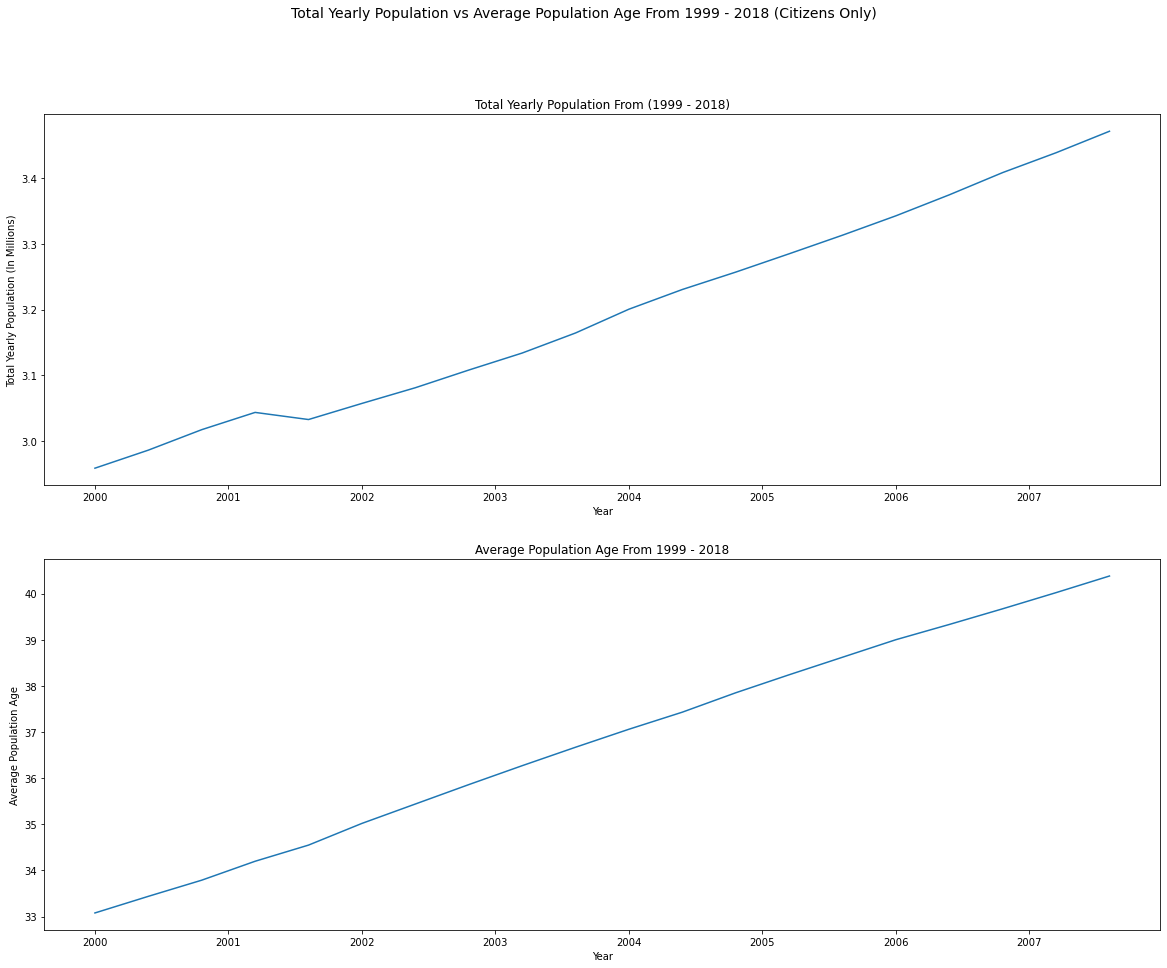

In [4]:
# Visual representation of data using matplotlib

# matplotlib will give a warning if we do not specify the locations of ticks on the x axis as we set custom tick labels. Hence, I remove the warnings here. This is only for visual purposes as the line of warning prevents us from seeing the diagram in full size. 
# removing it will not affect any functionality of the code. 

import warnings
warnings.filterwarnings("ignore")

# Split dataset by year 
df_1999 = age_population_df[age_population_df['Year'].dt.year == 1999]
df_2000 = age_population_df[age_population_df['Year'].dt.year == 2000]
df_2001 = age_population_df[age_population_df['Year'].dt.year == 2001]
df_2002 = age_population_df[age_population_df['Year'].dt.year == 2002]
df_2003 = age_population_df[age_population_df['Year'].dt.year == 2003]
df_2004 = age_population_df[age_population_df['Year'].dt.year == 2004]
df_2005 = age_population_df[age_population_df['Year'].dt.year == 2005]
df_2006 = age_population_df[age_population_df['Year'].dt.year == 2006]
df_2007 = age_population_df[age_population_df['Year'].dt.year == 2007]
df_2008 = age_population_df[age_population_df['Year'].dt.year == 2008]
df_2009 = age_population_df[age_population_df['Year'].dt.year == 2009]
df_2010 = age_population_df[age_population_df['Year'].dt.year == 2010]
df_2011 = age_population_df[age_population_df['Year'].dt.year == 2011]
df_2012 = age_population_df[age_population_df['Year'].dt.year == 2012]
df_2013 = age_population_df[age_population_df['Year'].dt.year == 2013]
df_2014 = age_population_df[age_population_df['Year'].dt.year == 2014]
df_2015 = age_population_df[age_population_df['Year'].dt.year == 2015]
df_2016 = age_population_df[age_population_df['Year'].dt.year == 2016]
df_2017 = age_population_df[age_population_df['Year'].dt.year == 2017]
df_2018 = age_population_df[age_population_df['Year'].dt.year == 2018]
df_list = [df_1999, df_2000, df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]
year_list = ["1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]


# Calculate the average population age per year and add it to a list
average_yearly_age_arr = []
total_yearly_population_arr = []

for df in df_list:
    total_yearly_population = 0
    total_number_median = 0
    for number, number_median in zip(df["Number"], df["Number * Median Age"]):
        
        total_yearly_population += int(number)
        total_number_median += int(number_median)
        total_yearly_population_millions = total_yearly_population/1000000

    average_yearly_age = total_number_median/total_yearly_population
    average_yearly_age_arr.append(round(average_yearly_age,2))
    total_yearly_population_arr.append(total_yearly_population_millions)






# Plot the graphs
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("Total Yearly Population vs Average Population Age From 1999 - 2018 (Citizens Only)", fontsize=14)

# line graph for total yearly population
ax1.set_xticklabels(year_list)
ax1.set(title="Total Yearly Population From (1999 - 2018)",
        xlabel="Year", ylabel="Total Yearly Population (In Millions)")
ax1.plot(total_yearly_population_arr)

# line graph for average yearly population age
ax2.set_xticklabels(year_list)
ax2.set(title="Average Population Age From 1999 - 2018",
        xlabel="Year", ylabel="Average Population Age")
ax2.plot(average_yearly_age_arr)



plt.savefig("./plots/population.png")

## Why is the population aging?

To answer the question if Singapore's population is coming to a decline, we have found one possible reason, the aging population. Now, let us find out why the population is aging. Usually an aging population is caused by a decline in birth rate, or a higher life expectancy at birth. Let us explore these factors.

Dataset used:
- live-births.csv (Found at: https://data.gov.sg/dataset/births-and-fertility-annual)
- health-adjusted-life-expectancy-at-birth.csv (Found at:https://data.gov.sg/dataset/health-adjusted-life-expectancy)


In [5]:
# Import dataset into a pandas dataframe
births_df = pd.read_csv("./data/population/live-births.csv", parse_dates=['year'])

print("Raw Data")
display(births_df)
print()

# Limit to from 1990 - 2018 of dataset
births_df = births_df[(births_df["year"] > '1989-01-01') & (births_df['year'] < '2019-01-01')]

# Split dataframe by total live births
total_births_df = births_df[births_df["level_1"] == "Total Live-births"]

# Drop level_1 column as it is no longer relavent
total_births_df = total_births_df.drop('level_1', 1)
total_births_df.columns = ["Year", "Total Live-Births"]
total_births_df.reset_index(inplace = True)

# Convery total live births column into integers
total_births_df = total_births_df.astype({"Total Live-Births": int})

# Split dataframe by resident live births
resident_births_df = births_df[births_df["level_1"] == "Resident Live-births"]
resident_births_df = resident_births_df.drop('level_1', 1)
resident_births_df.columns = ["Year", "Resident Live-Births"]
resident_births_df.reset_index(inplace = True)
resident_births_df = resident_births_df.astype({"Resident Live-Births": int})

# Add resident live births as a column to our dataframe
total_births_df["Resident Live-Births"] = resident_births_df["Resident Live-Births"]

# Calculate non-resident live births and add it to our dataframe
total_births_df["Other Live-Births"] = total_births_df["Total Live-Births"] - resident_births_df["Resident Live-Births"]

# Change datetime format of year column to show only the year
total_births_df['Year'] = pd.DatetimeIndex(total_births_df['Year']).year

# Drop index column which was created when we reset the index for our dataframe
total_births_df = total_births_df.drop("index", 1)

Raw Data


,year,level_1,value
0,1960-01-01,Total Live-births,61775
1,1960-01-01,Resident Live-births,na
2,1961-01-01,Total Live-births,59930
3,1961-01-01,Resident Live-births,na
4,1962-01-01,Total Live-births,58977
...,...,...,...
113,2016-01-01,Resident Live-births,36875
114,2017-01-01,Total Live-births,39615
115,2017-01-01,Resident Live-births,35444
116,2018-01-01,Total Live-births,39039


## Numerical analysis of the **live births** dataset with Pandas

In [6]:
print("Data after cleaning up")
display(total_births_df)
print()

print("Summary of cleaned up dataset")
display(total_births_df.describe(include="all", datetime_is_numeric=True))

print('Technical summary of cleaned up dataset')
display(total_births_df.info())
print()

print("Number of non-na entries")
display(total_births_df.notna().sum())
print()

Data after cleaning up


,Year,Total Live-Births,Resident Live-Births,Other Live-Births
0,1990,51142,49787,1355
1,1991,49114,47805,1309
2,1992,49402,47907,1495
3,1993,50225,48739,1486
4,1994,49554,48075,1479
5,1995,48635,46916,1719
6,1996,48577,46707,1870
7,1997,47333,45356,1977
8,1998,43664,41636,2028
9,1999,43336,41327,2009



Summary of cleaned up dataset


,Year,Total Live-Births,Resident Live-Births,Other Live-Births
count,29.000000,29.000000,29.000000,29.000000
mean,2004.000000,42892.068966,40322.655172,2569.413793
std,8.514693,4530.449465,5124.099986,1024.896006
min,1990.000000,37174.000000,35040.000000,1309.000000
25%,1997.000000,39570.000000,36178.000000,1964.000000
50%,2004.000000,41451.000000,37967.000000,2170.000000
75%,2011.000000,47333.000000,45356.000000,3476.000000
max,2018.000000,51142.000000,49787.000000,4376.000000


Technical summary of cleaned up dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  29 non-null     int64
 1   Total Live-Births     29 non-null     int32
 2   Resident Live-Births  29 non-null     int32
 3   Other Live-Births     29 non-null     int32
dtypes: int32(3), int64(1)
memory usage: 708.0 bytes


None


Number of non-na entries


Year                    29
Total Live-Births       29
Resident Live-Births    29
Other Live-Births       29
dtype: int64

In [7]:
# Import dataset into a pandas dataframe
expectancy_df = pd.read_csv("./data/population/health-adjusted-life-expectancy-at-birth.csv", parse_dates=['year'])

print("Raw Data")
display(expectancy_df)

# Split dataframe by male expectancy
total_expectancy_df = expectancy_df[expectancy_df['sex'] == "Male"]

# Drop sex column as it is no longer useful
total_expectancy_df = total_expectancy_df.drop('sex', 1)
total_expectancy_df.columns = ["Year", "Male"]
total_expectancy_df.reset_index(inplace = True)

# Split dataframe by female expectancy
female_expectancy_df = expectancy_df[expectancy_df['sex'] == "Female"]

# Drop sex column as it is no longer useful
female_expectancy_df = female_expectancy_df.drop('sex', 1)
female_expectancy_df.columns = ["Year", "Female"]
female_expectancy_df.reset_index(inplace = True)

# Add female expectancy to our dataframe as a column
total_expectancy_df = total_expectancy_df.join(female_expectancy_df["Female"])

# Change format of datetime values in year column to show only the year
total_expectancy_df['Year'] = pd.DatetimeIndex(total_expectancy_df['Year']).year

# Drop index column which was created when we reset our indexes
total_expectancy_df = total_expectancy_df.drop('index', 1)



Raw Data


,year,sex,hale_years
0,1990-01-01,Male,65.3
1,1990-01-01,Female,68.2
2,1995-01-01,Male,66.5
3,1995-01-01,Female,69.5
4,2000-01-01,Male,68.6
5,2000-01-01,Female,71.1
6,2005-01-01,Male,70.3
7,2005-01-01,Female,72.8
8,2010-01-01,Male,71.7
9,2010-01-01,Female,73.8


## Numerical analysis of the **life expectancy** dataset with Pandas

In [8]:
print("Data after cleaning up")
display(total_expectancy_df)
print()

print("Summary of cleaned up dataset")
display(total_expectancy_df.describe(include="all", datetime_is_numeric=True))
print()

print('Technical summary of cleaned up dataset')
display(total_expectancy_df.info())
print()

print("Number of non-na entries")
display(total_expectancy_df.notna().sum())
print()

Data after cleaning up


,Year,Male,Female
0,1990,65.3,68.2
1,1995,66.5,69.5
2,2000,68.6,71.1
3,2005,70.3,72.8
4,2010,71.7,73.8
5,2015,73.0,74.7
6,2019,73.7,75.2



Summary of cleaned up dataset


,Year,Male,Female
count,7.000000,7.000000,7.000000
mean,2004.857143,69.871429,72.185714
std,10.574002,3.210771,2.666726
min,1990.000000,65.300000,68.200000
25%,1997.500000,67.550000,70.300000
50%,2005.000000,70.300000,72.800000
75%,2012.500000,72.350000,74.250000
max,2019.000000,73.700000,75.200000



Technical summary of cleaned up dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Male    7 non-null      float64
 2   Female  7 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 296.0 bytes


None


Number of non-na entries


Year      7
Male      7
Female    7
dtype: int64

## Visualisation of Data Using MatplotLib
From the first bar chart for the live births dataset, we can see that over the years, the number of births by residents is steadily decreasing, while the number of births by non-residents shows a general increase. We can speculate that this could be due to the increasing costs of living and raising a family, which local residents might not be able to afford as much compared to foreigners. In the next section, we will explore this area. 
<br>

From the second bar chart, we can see that the general life expectancy has gone up in the past 2 decades, with the life expectancy of females always being higher than males. 
<br>

To conclude, these are 2 factors on why Singapore is experiencing an aging population, which in turn can lead to a decline in the population. In the next section, we will explore a possible reason of the decline in birth rates by residents - The cost of housing.

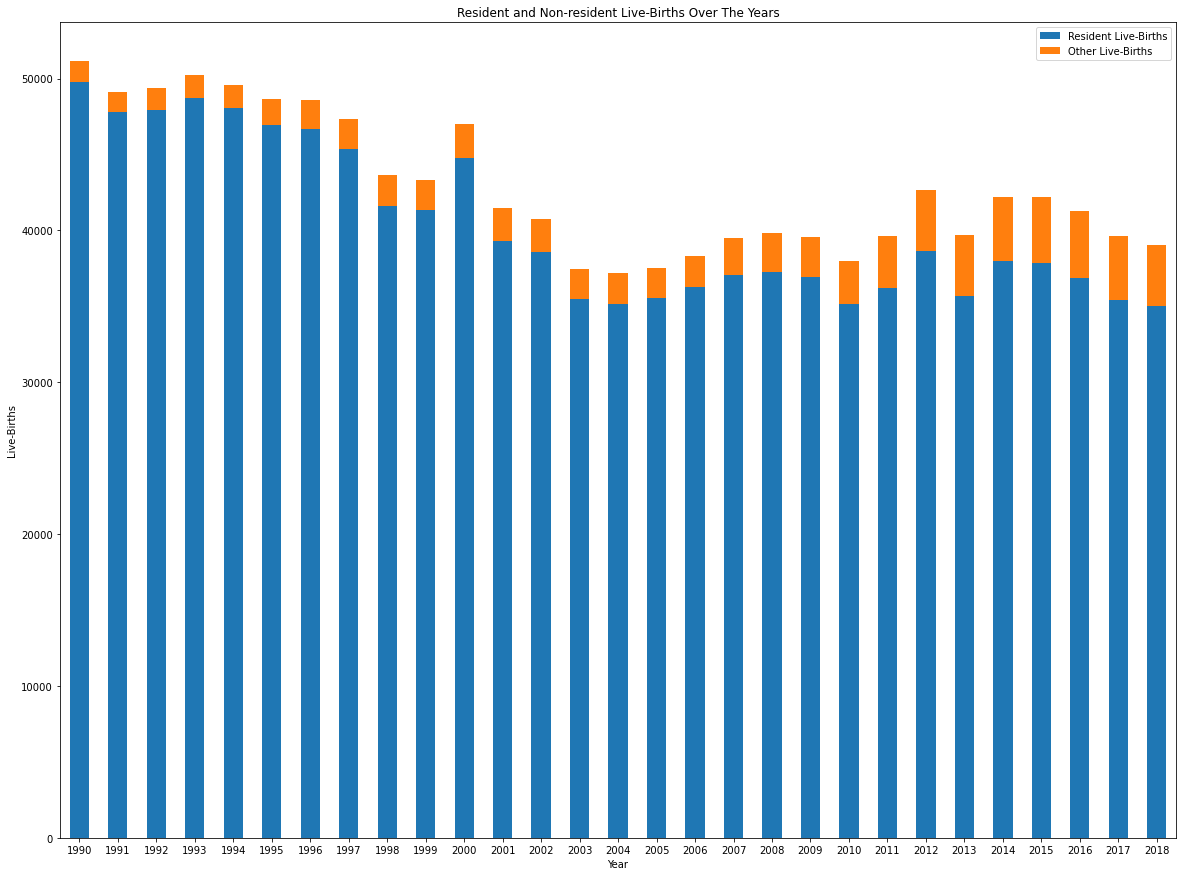

In [9]:
# Visual representation of data using matplotlib
ax = total_births_df[["Resident Live-Births", "Other Live-Births"]].plot(kind="bar", stacked=True)
ax.set_xticklabels(total_births_df["Year"], rotation=0)
ax.set_title("Resident and Non-resident Live-Births Over The Years")
ax.set_ylabel('Live-Births')
ax.set_xlabel('Year')
ax.legend()

plt.savefig("./plots/live_births.png")
  



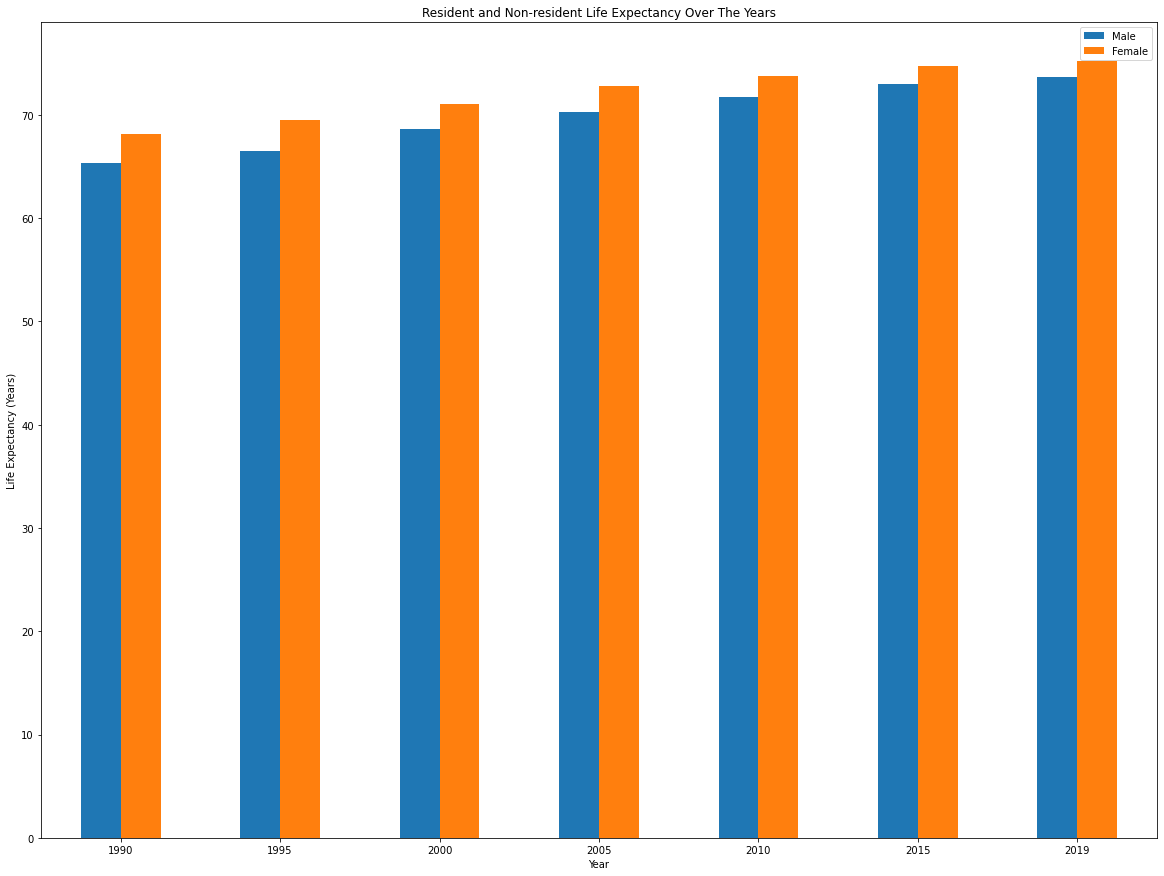

In [10]:
# Visual representation of data using matplotlib

ax = total_expectancy_df[["Male", "Female"]].plot(kind="bar")
ax.set_xticklabels(total_expectancy_df["Year"], rotation=0)
ax.set_title("Resident and Non-resident Life Expectancy Over The Years")
ax.set_ylabel('Life Expectancy (Years)')
ax.set_xlabel('Year')
ax.legend()


plt.savefig("./plots/life_expectancy.png")
  

## Why is the birth rate by local residents in Singapore decreasing?

To answer the question if Singapore's population is coming to a decline, we have found one possible factor, the aging population. We have also found that the birth rate by local residents is declining. One of the possible reasons is an increase not only housing costs, but also maintenance costs of housing such as taxes. These are just some factors that come into play when raising a family. I also want to find out if there is anything being done to combat the rising housing costs.

Dataset used:
- price-range-of-hdb-flats-offered.csv (Found at: https://data.gov.sg/dataset/price-range-of-hdb-flats-offered)
- median-annual-value-and-property-tax-by-type-of-hdb.csv (Found at: https://data.gov.sg/dataset/households-that-benefitted-from-cpf-housing-grant)
- cpf-housing-grants-awarded-by-type.csv (Found at: https://data.gov.sg/dataset/annual-value-and-property-tax-by-property-type-annual?resource_id=48520cf7-bbcd-4824-8ce0-93f5f9794672)




In [11]:
# Import dataset into a pandas dataframe
hdb_price_df = pd.read_csv("./data/living_costs/price-range-of-hdb-flats-offered.csv", parse_dates=['financial_year'])

print("Raw Data")
display(hdb_price_df)
print()

# Drop these columns as not all years have data for grants.
# The price before grants is still useful in our analysis and an indication of how housing prices have changed
hdb_price_df = hdb_price_df.drop("min_selling_price_less_ahg_shg", 1)
hdb_price_df = hdb_price_df.drop("max_selling_price_less_ahg_shg", 1)

# Drop town column as we are looking at the general prices of HDB flats offered as a whole
hdb_price_df = hdb_price_df.drop("town", 1)

# Convert room-type column into numerical values
hdb_price_df["room_type"] = hdb_price_df["room_type"].str.replace('-room','')
hdb_price_df = hdb_price_df.astype({"room_type": int})

# Change format of datetime values in the financial year column to display only the year
hdb_price_df['financial_year'] = pd.DatetimeIndex(hdb_price_df['financial_year']).year

# Remove all rows with 0 as that indicates that there are no flats offered in that area
hdb_price_df = hdb_price_df[hdb_price_df.min_selling_price != 0]





Raw Data


,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008-01-01,Punggol,2-room,82000,107000,0,0
1,2008-01-01,Punggol,3-room,135000,211000,0,0
2,2008-01-01,Punggol,4-room,223000,327000,0,0
3,2008-01-01,Punggol,5-room,305000,428000,0,0
4,2008-01-01,Jurong West,3-room,142000,160000,0,0
...,...,...,...,...,...,...,...
228,2019-01-01,Tengah,5-room,409000,510000,364000,465000
229,2019-01-01,Woodlands,2-room,86000,128000,6000,48000
230,2019-01-01,Woodlands,3-room,165000,194000,90000,119000
231,2019-01-01,Woodlands,4-room,244000,295000,184000,235000


## Numerical analysis of the **HDB prices** dataset with Pandas

In [12]:
print("Data after cleaning up")
display(hdb_price_df)
print()

print("Summary of cleaned up dataset")
display(hdb_price_df.describe(include="all", datetime_is_numeric=True))
print()

print('Technical summary of cleaned up dataset')
display(hdb_price_df.info())
print()

print("Number of non-na entries")
display(hdb_price_df.notna().sum())
print()

Data after cleaning up


,financial_year,room_type,min_selling_price,max_selling_price
0,2008,2,82000,107000
1,2008,3,135000,211000
2,2008,4,223000,327000
3,2008,5,305000,428000
4,2008,3,142000,160000
...,...,...,...,...
228,2019,5,409000,510000
229,2019,2,86000,128000
230,2019,3,165000,194000
231,2019,4,244000,295000



Summary of cleaned up dataset


,financial_year,room_type,min_selling_price,max_selling_price
count,225.000000,225.000000,225.000000,225.000000
mean,2013.537778,3.524444,202542.222222,269213.333333
std,3.423872,1.073453,90661.749910,112767.573860
min,2008.000000,2.000000,68000.000000,94000.000000
25%,2011.000000,3.000000,134000.000000,172000.000000
50%,2013.000000,4.000000,203000.000000,266000.000000
75%,2017.000000,4.000000,274000.000000,365000.000000
max,2019.000000,5.000000,423000.000000,551000.000000



Technical summary of cleaned up dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 232
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   financial_year     225 non-null    int64
 1   room_type          225 non-null    int32
 2   min_selling_price  225 non-null    int64
 3   max_selling_price  225 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 7.9 KB


None


Number of non-na entries


financial_year       225
room_type            225
min_selling_price    225
max_selling_price    225
dtype: int64

In [13]:
# Import dataset into a pandas dataframe
property_tax_df = pd.read_csv("./data/living_costs/median-annual-value-and-property-tax-by-type-of-hdb.csv", parse_dates=['financial_year'])

print("Raw Data")
display(property_tax_df)
print()

# Change the format of datetime values in the financial year column to show only year
property_tax_df['financial_year'] = pd.DatetimeIndex(property_tax_df['financial_year']).year

# Drop type of hdb column
property_tax_df = property_tax_df.drop("type_of_hdb", 1)


Raw Data


,financial_year,type_of_hdb,no_of_cases,median_annual_value,property_tax_collection
0,2010-01-01,1 or 2 Room,8632,4500,190
1,2010-01-01,3 Room,213865,6300,16259
2,2010-01-01,4 Room,339721,8100,45089
3,2010-01-01,5 Room,209210,9000,37936
4,2010-01-01,Executive & Others,64613,9300,13046
5,2011-01-01,1 or 2 Room,9310,5400,242
6,2011-01-01,3 Room,214311,7800,15120
7,2011-01-01,4 Room,347111,9600,41575
8,2011-01-01,5 Room,212018,10800,35677
9,2011-01-01,Executive & Others,64858,11100,11929


## Numerical analysis of the **property tax** dataset with Pandas

In [14]:
print("Data after cleaning up")
display(property_tax_df)
print()

print("Summary of cleaned up dataset")
display(property_tax_df.describe(include="all", datetime_is_numeric=True))
print()

print('Technical summary of cleaned up dataset')
display(property_tax_df.info())
print()

print("Number of non-na entries")
display(hdb_price_df.notna().sum())
print()

Data after cleaning up


,financial_year,no_of_cases,median_annual_value,property_tax_collection
0,2010,8632,4500,190
1,2010,213865,6300,16259
2,2010,339721,8100,45089
3,2010,209210,9000,37936
4,2010,64613,9300,13046
5,2011,9310,5400,242
6,2011,214311,7800,15120
7,2011,347111,9600,41575
8,2011,212018,10800,35677
9,2011,64858,11100,11929



Summary of cleaned up dataset


,financial_year,no_of_cases,median_annual_value,property_tax_collection
count,50.000000,50.000000,50.000000,50.000000
mean,2014.500000,182906.060000,8944.800000,25370.000000
std,2.901442,131267.116746,2240.271704,19297.533175
min,2010.000000,8632.000000,4500.000000,190.000000
25%,2012.000000,64965.000000,7860.000000,11985.750000
50%,2014.500000,214846.000000,9600.000000,18514.500000
75%,2017.000000,239240.500000,10680.000000,43087.750000
max,2019.000000,421494.000000,12000.000000,60632.000000



Technical summary of cleaned up dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   financial_year           50 non-null     int64
 1   no_of_cases              50 non-null     int64
 2   median_annual_value      50 non-null     int64
 3   property_tax_collection  50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


None


Number of non-na entries


financial_year       225
room_type            225
min_selling_price    225
max_selling_price    225
dtype: int64

In [15]:
# Import dataset into a pandas dataframe
hdb_grants_df = pd.read_csv("./data/living_costs/cpf-housing-grants-awarded-by-type.csv", parse_dates=['financial_year'])

print("Raw Data")
display(hdb_grants_df)
print()

# Limit to last 5 years of dataset
hdb_grants_df = hdb_grants_df[(hdb_grants_df["financial_year"] > '2014-01-01') & (hdb_grants_df['financial_year'] < '2020-01-01')]

hdb_grants_df = hdb_grants_df.astype({"no_of_hh": int})

hdb_grants_df['financial_year'] = pd.DatetimeIndex(hdb_grants_df['financial_year']).year

# Remove all rows with grants other than CPF housing grant or grants less than 0
hdb_grants_df = hdb_grants_df[hdb_grants_df.housing_grant_scheme != "Additional CPF Housing Grant"]
hdb_grants_df = hdb_grants_df[hdb_grants_df.housing_grant_scheme != "Special CPF Housing Grant"]
hdb_grants_df = hdb_grants_df[hdb_grants_df.housing_grant_scheme != "Proximity Housing Grant"]
hdb_grants_df = hdb_grants_df[hdb_grants_df.no_of_hh > 0 ]




Raw Data


,financial_year,housing_grant_scheme,type_of_grant,no_of_hh
0,2010-01-01,CPF Housing Grant,Family Grant (living near parents/married child),2249
1,2010-01-01,CPF Housing Grant,Family Grant,4198
2,2010-01-01,CPF Housing Grant,Singles Grant,926
3,2010-01-01,CPF Housing Grant,Joint Singles Grant,59
4,2010-01-01,Additional CPF Housing Grant,na,10307
...,...,...,...,...
69,2019-01-01,CPF Housing Grant,Singles Grant (living with parents),0
70,2019-01-01,CPF Housing Grant,Joint Singles Grant,49
71,2019-01-01,Additional CPF Housing Grant,na,11067
72,2019-01-01,Special CPF Housing Grant,na,5977


## Numerical analysis of the **housing grants** dataset with Pandas

In [16]:
print("Data after cleaning up")
display(hdb_grants_df)
print()

print("Summary of cleaned up dataset")
display(hdb_grants_df.describe(include="all", datetime_is_numeric=True))
print()

print('Technical info of cleaned up dataset')
display(hdb_grants_df.info())
print()

print("Number of non-na entries")
display(hdb_grants_df.notna().sum())
print()

Data after cleaning up


,financial_year,housing_grant_scheme,type_of_grant,no_of_hh
34,2015,CPF Housing Grant,Family Grant (living near parents/married child),563
35,2015,CPF Housing Grant,Family Grant,3327
36,2015,CPF Housing Grant,Singles Grant,2190
37,2015,CPF Housing Grant,Singles Grant (living with parents),37
38,2015,CPF Housing Grant,Joint Singles Grant,56
43,2016,CPF Housing Grant,Family Grant,5174
44,2016,CPF Housing Grant,Singles Grant,2676
46,2016,CPF Housing Grant,Joint Singles Grant,57
51,2017,CPF Housing Grant,Family Grant,6400
52,2017,CPF Housing Grant,Singles Grant,3450



Summary of cleaned up dataset


,financial_year,housing_grant_scheme,type_of_grant,no_of_hh
count,17.000000,17,17,17.000000
unique,NaN,1,5,NaN
top,NaN,CPF Housing Grant,Family Grant,NaN
freq,NaN,17,5,NaN
mean,2016.764706,NaN,NaN,2490.000000
std,1.521899,NaN,NaN,2287.347782
min,2015.000000,NaN,NaN,37.000000
25%,2015.000000,NaN,NaN,59.000000
50%,2017.000000,NaN,NaN,2676.000000
75%,2018.000000,NaN,NaN,3798.000000



Technical info of cleaned up dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 34 to 70
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   financial_year        17 non-null     int64 
 1   housing_grant_scheme  17 non-null     object
 2   type_of_grant         17 non-null     object
 3   no_of_hh              17 non-null     int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 612.0+ bytes


None


Number of non-na entries


financial_year          17
housing_grant_scheme    17
type_of_grant           17
no_of_hh                17
dtype: int64

## Visualisation of Data Using MatplotLib
From the boxplot for prices of HDB flats over the years, we can see that there is a general increase in prices for HDB flats over the years, except for a few outliers, in 2013 and 2016, where the average prices dropped. 
<br>

From the scatterplot of income tax collected over the years, from the results, we can see that even though that there are more homeowners over the years as the number of cases increase, the value of property tax has decreased in most cases. This could mean that the government has helped to combat the costs of housing by lowering the property tax for HDB flats, since we have already observed that the value of the flats have increased over the years. 
<br>

In the pie charts, we can see that over the years, the percentage of family grants issued had seen an increase from 2015 - 2016, but remains relatively stegnant in the following years. This could mean that the criteria was changed from 2015 - 2016, to allow more families to get the grant. However, I believe that due to the diminishing birth rates and the increasing cost of housing, there are not many locals looking to start families.  
<br>

To conclude, the prices of housing has definitely increased over the years, but the government is putting in work to combat it, like lowering property tax and issuing more housing grants. 

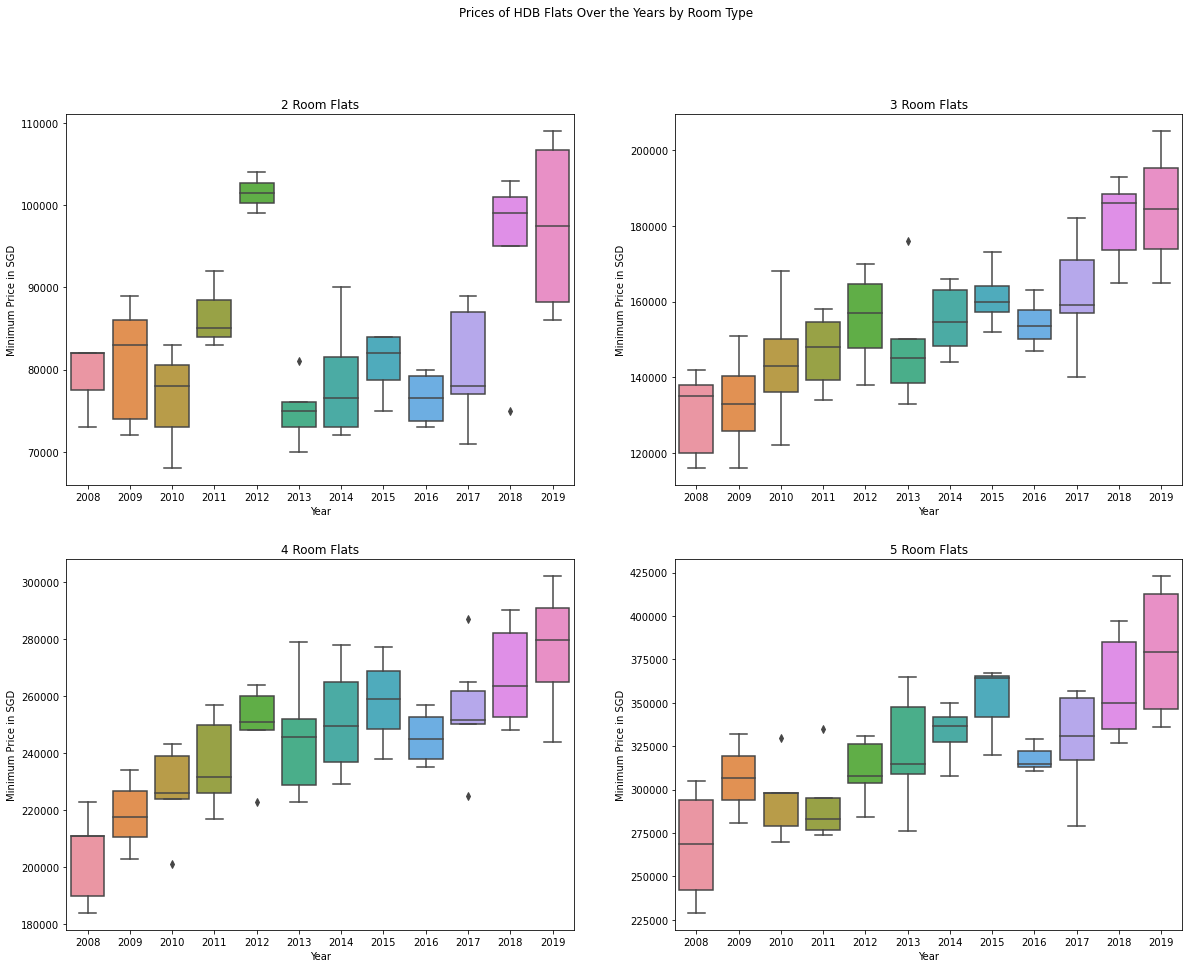

In [17]:
hdb_df_array = []
hdb_df_array.append(hdb_price_df[hdb_price_df["room_type"] == 2])
hdb_df_array.append(hdb_price_df[hdb_price_df["room_type"] == 3])
hdb_df_array.append(hdb_price_df[hdb_price_df["room_type"] == 4])
hdb_df_array.append(hdb_price_df[hdb_price_df["room_type"] == 5])

fig, axes = plt.subplots(2, 2)
fig.suptitle("Prices of HDB Flats Over the Years by Room Type")


sns.boxplot(ax = axes[0, 0], x="financial_year", y="min_selling_price", data=hdb_df_array[0])
axes[0, 0].set(title="2 Room Flats", xlabel="Year", ylabel="Minimum Price in SGD")

sns.boxplot(ax = axes[0, 1], x="financial_year", y="min_selling_price", data=hdb_df_array[1])
axes[0, 1].set(title="3 Room Flats", xlabel="Year", ylabel="Minimum Price in SGD")

sns.boxplot(ax = axes[1, 0], x="financial_year", y="min_selling_price", data=hdb_df_array[2])
axes[1, 0].set(title="4 Room Flats", xlabel="Year", ylabel="Minimum Price in SGD")

sns.boxplot(ax = axes[1, 1], x="financial_year", y="min_selling_price", data=hdb_df_array[3])
axes[1, 1].set(title="5 Room Flats", xlabel="Year", ylabel="Minimum Price in SGD")

plt.savefig("./plots/hdb_prices.png")



In [18]:
ax = sns.scatterplot(data=property_tax_df, x="property_tax_collection", y="no_of_cases", hue="financial_year")
ax.set_title("Value of Property Tax Collected vs Number of Cases Over the Years")
ax.set_ylabel("Number of Cases")
ax.set_xlabel("Property Tax Collected (SGD)")

plt.savefig("./plots/property_tax.png")

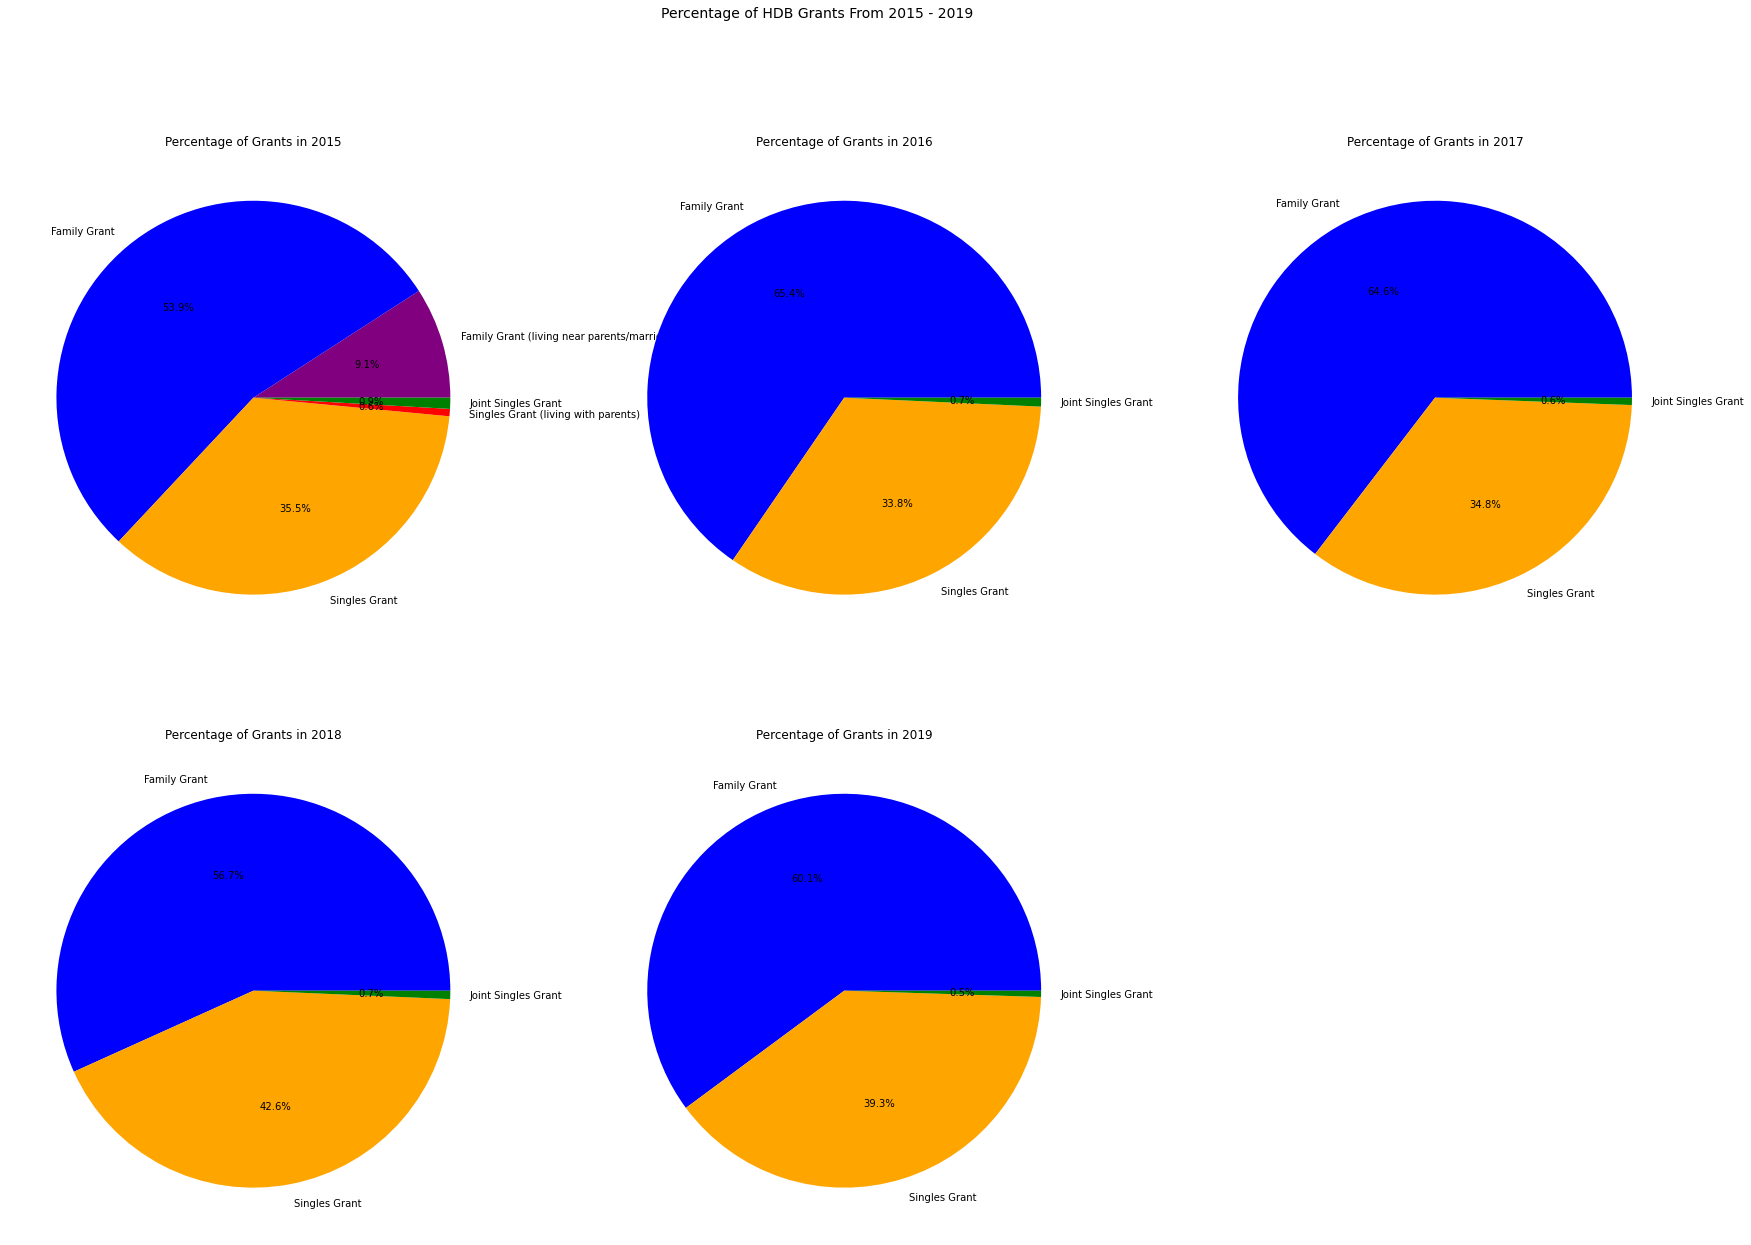

In [ ]:
hdb_grants_df_array = []
hdb_grants_df_array.append(hdb_grants_df[hdb_grants_df["financial_year"] == 2015])
hdb_grants_df_array.append(hdb_grants_df[hdb_grants_df["financial_year"] == 2016])
hdb_grants_df_array.append(hdb_grants_df[hdb_grants_df["financial_year"] == 2017])
hdb_grants_df_array.append(hdb_grants_df[hdb_grants_df["financial_year"] == 2018])
hdb_grants_df_array.append(hdb_grants_df[hdb_grants_df["financial_year"] == 2019])

colors = ["blue", "orange", "green", "purple", "red"]

fig, ax = plt.subplots(2, 3, figsize=(30,20))

ax[0, 0].pie(hdb_grants_df_array[0]["no_of_hh"],labels=hdb_grants_df_array[0]["type_of_grant"],autopct='%1.1f%%', colors=["purple", "blue", "orange", "red", "green"])
ax[0, 0].set(title="Percentage of Grants in 2015")

ax[0, 1].pie(hdb_grants_df_array[1]["no_of_hh"],labels=hdb_grants_df_array[1]["type_of_grant"],autopct='%1.1f%%', colors=colors)
ax[0, 1].set(title="Percentage of Grants in 2016")

ax[0, 2].pie(hdb_grants_df_array[2]["no_of_hh"],labels=hdb_grants_df_array[2]["type_of_grant"],autopct='%1.1f%%', colors=colors)
ax[0, 2].set(title="Percentage of Grants in 2017")

ax[1, 0].pie(hdb_grants_df_array[3]["no_of_hh"],labels=hdb_grants_df_array[3]["type_of_grant"],autopct='%1.1f%%', colors=colors)
ax[1, 0].set(title="Percentage of Grants in 2018")

ax[1, 1].pie(hdb_grants_df_array[4]["no_of_hh"],labels=hdb_grants_df_array[4]["type_of_grant"],autopct='%1.1f%%', colors=colors)
ax[1, 1].set(title="Percentage of Grants in 2019")

ax[-1, -1].axis('off')

fig.suptitle(
    "Percentage of HDB Grants From 2015 - 2019", fontsize=14)

plt.savefig("./plots/hdb_grants.png")

## Conclusion

Even though the population has not yet started declining it might soon come to a decline. Due to the decreasing number of birth rates and increasing life expectancy of local residents, the population age is increasing by the year, which is a factor that contributes to population decline. A reason for this as we have explored is the increasing cost of housing in Singapore, which is an important part to consider when starting a family. Though from the data it appears that there are things done by the government to combat this such as lowering property tax and issuing more housing grants, it might not be enough to encourage more locals to start families. 